# 지니계산법
- c 클래스 갯수
- pi 클래스에 속하는 샘플 비용

$$
G=1-\sum_{i=1}^C p_i^2
$$


# 엔트로피 계산법
$$
H(S)=-\sum_{i=1}^C p_i \log _2 p_i
$$

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [8]:
iris = load_iris()
X  = iris.data[:,2:] # 전체 행, 2번째 인덱스 부터 전체 출력
y  = iris.target

In [12]:
tree_clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
# criterion='entropy' ,gini 측정이 디폴트
tree_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

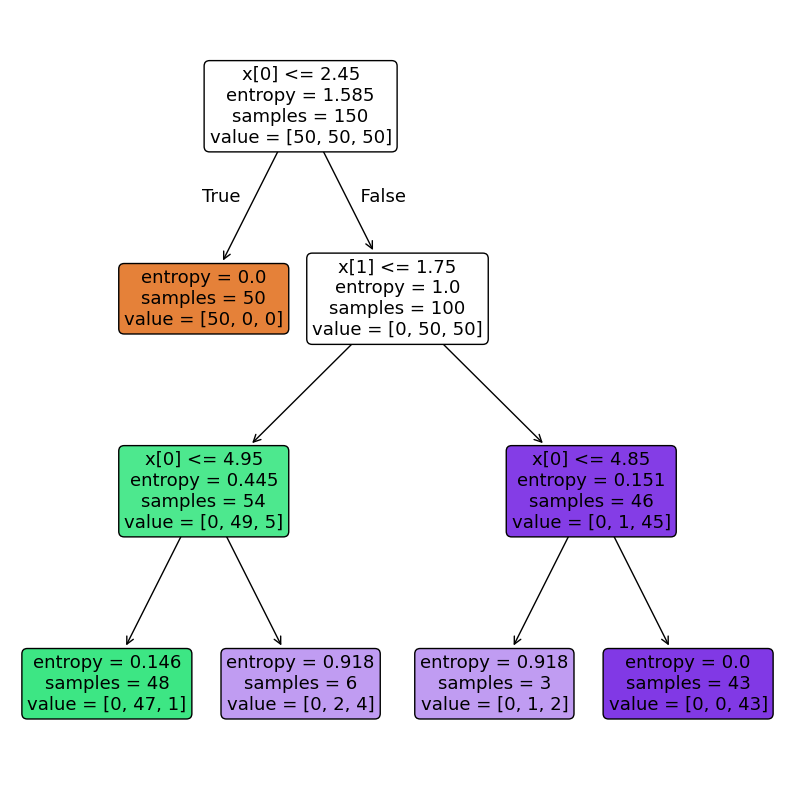

In [13]:
plt.figure(figsize=(10,10))
plot_tree(tree_clf, filled=True, rounded=True)
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [15]:
#예측 및 평가

y_pred_train = tree_clf.predict(X)

accuracy = accuracy_score(y, y_pred_train)
precision = precision_score(y, y_pred_train, average='macro')
recall = recall_score(y, y_pred_train, average='macro')
f1 = f1_score(y, y_pred_train, average='macro')
conf_matrix = confusion_matrix(y, y_pred_train)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9733333333333334
Precision: 0.9738247863247862
Recall: 0.9733333333333333
F1 Score: 0.9733226623982927
Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [16]:
# Confusion Matrix의 각 요소 정리
tp_00 = conf_matrix[0, 0]  # 클래스 0에 대한 True Positive
fp_01 = conf_matrix[0, 1]  # 클래스 0에 대한 False Positive (클래스 1으로 잘못 예측)
fp_02 = conf_matrix[0, 2]  # 클래스 0에 대한 False Positive (클래스 2로 잘못 예측)
tp_11 = conf_matrix[1, 1]  # 클래스 1에 대한 True Positive
fn_10 = conf_matrix[1, 0]  # 클래스 1에 대한 False Negative (클래스 0으로 잘못 예측)
fp_12 = conf_matrix[1, 2]  # 클래스 1에 대한 False Positive (클래스 2로 잘못 예측)
tp_22 = conf_matrix[2, 2]  # 클래스 2에 대한 True Positive
fn_20 = conf_matrix[2, 0]  # 클래스 2에 대한 False Negative (클래스 0으로 잘못 예측)
fn_21 = conf_matrix[2, 1]  # 클래스 2에 대한 False Negative (클래스 1으로 잘못 예측)

print(f"Class 0 - TP: {tp_00}, FP (Class 1): {fp_01}, FP (Class 2): {fp_02}")
print(f"Class 1 - TP: {tp_11}, FN (Class 0): {fn_10}, FP (Class 2): {fp_12}")
print(f"Class 2 - TP: {tp_22}, FN (Class 0): {fn_20}, FN (Class 1): {fn_21}")

Class 0 - TP: 50, FP (Class 1): 0, FP (Class 2): 0
Class 1 - TP: 47, FN (Class 0): 0, FP (Class 2): 3
Class 2 - TP: 49, FN (Class 0): 0, FN (Class 1): 1
